<a href="https://colab.research.google.com/github/AndresMontesDeOca/RegresionAvanzada/blob/main/TrabajoPractico.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Instalacion de Librerias

In [ ]:
# Instalacion de Paquetes
!pip install pingouin # No incluido en Google Colab
# !pip install scipy
# !pip install statsmodels

# Version rpy2 que no tiene problemas de compatibilidad
!pip install rpy2==3.5.1

# Cargamos Librerias y Datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats as st
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.tools.tools as smt

# Ignorar Warnings
import warnings
warnings.filterwarnings('ignore')

# Asthetics
sns.set(style='ticks', context='notebook', palette='colorblind', font_scale=1, color_codes=True)

# Recursion limit errors with R Magic
import sys
# sys.setrecursionlimit(50000)

# Activamos R magic
%load_ext rpy2.ipython

#### Carga de Datos desde Goolge Drive

In [7]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

################################# Datasets ###################################
# Grasa de Cerdos
id = '153lGVzdixcHT-keKg8qmvaoWdPHg6_tB'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('grasacerdos.xlsx')
dataG = pd.read_excel('grasacerdos.xlsx', index_col='Obs') # Cargamos el Dataset
dataG = dataG.replace(to_replace=',', value='.', regex=True) # Reemplazo , por .
dataG = dataG.astype('float') # Transformo en float
%R -i dataG
######################################################
# Peso, Edad, Colesterol
id = '17Dv1WcWlc9ojWa6bnSfD7TCRaVKCKqj0'
downloaded = drive.CreateFile({'id':id})
downloaded.GetContentFile('peso_edad_colest.xlsx')
dataP = pd.read_excel('peso_edad_colest.xlsx')
%R -i dataP

In [ ]:
%%R

### MVN Henze-Zirkler Test ### -> Lento
# # system(sudo apt install libgsl-dev)
# install.packages('MVN')

# ## Wald Test ### -> Rapido
# install.packages('aod')

# ## QQ Plot, Bonferroni ### -> Lento
# install.packages('car')

# # LRM Tests ### -> Rapido
# install.packages('lmtest')

# ## Box-Cox Transformation ### -> Rapido
# install.packages('MASS')


####################################
### Installation Status ###
# print(system.file(package='MVN'))

# Capitulo I: Regresion Lineal Simple

## Ejercicio 1.1 - Correlacion

In [14]:
# Dataset Grasa de cerdos
data = dataG
display(dataG.head())

,PV,EGD
Obs,,
1,56.81,16.19
2,70.40,22.00
3,71.73,19.52
4,75.10,31.00
5,79.65,23.58


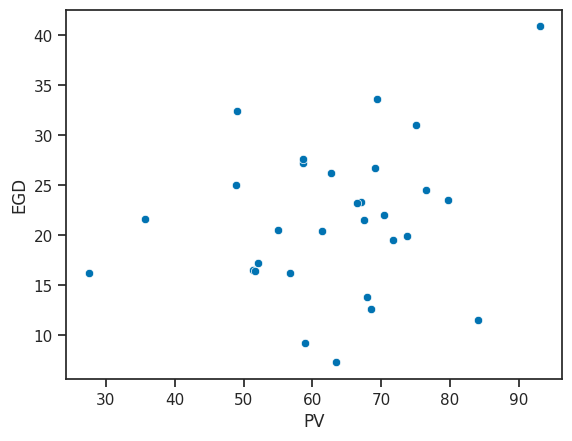

In [12]:
# Punto a -> Scatterplot e interpretacion
sns.scatterplot(data=data, x='PV', y='EGD')
plt.show()

a) No se observa patron de asociacion lineal en el grafico de dispersion

In [34]:
# Calculo del Coeficiente de Correlacion
# display(data.head())
display(pg.corr(data.PV, data.EGD, method='pearson'))
display(pg.corr(data.PV, data.EGD, method='spearman'))
display(pg.corr(data.PV, data.EGD, method='kendall'))

# Verificacion de Normalidad de las Variables
print('\n', pg.normality(data.PV))
print('\n', pg.normality(data.EGD))
print('\n', pg.multivariate_normality(data)) # Henze-Zirkler Test, H0 -> Multiv Normal Dist


,n,r,CI95%,p-val,BF10,power
pearson,30,0.254343,"[-0.12, 0.56]",0.174994,0.546,0.27791


,n,r,CI95%,p-val,power
spearman,30,0.166185,"[-0.21, 0.5]",0.380118,0.142724


,n,r,CI95%,p-val,power
kendall,30,0.112644,"[-0.26, 0.45]",0.395032,0.091095



            W      pval  normal
PV  0.975331  0.692481    True

             W      pval  normal
EGD  0.985135  0.939467    True

 HZResults(hz=0.25394365632841115, pval=0.9049686197809698, normal=True)


- b) Los Coeficientes de Correlacion no son significativos, se observa que los todos los IC de los distintos tests incluyen el 0
- c) No hay suficiente evidencia para rechazar el supuesto de Normalidad Bivariada

## Ejercicio 1.2 - Modelo Lineal Simple

In [35]:
dataC

NameError: ignored